In [50]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'scroll': True,})

%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.abspath("."))

In [51]:
%%html
<style>
body.rise-enabled div.code_cell{
    font-size:80%;
}

body.rise-enabled div.inner_cell>div.promt_container{
    width:10%;
}

body.rise-enabled div.inner_cell>div.text_cell_render.rendered_html {
    font-size: 50%;
}
</style>

# Geometry

The geometry kernel of COMPAS provides many functions, such as for example:

In [52]:
from compas.geometry import area_polygon
from compas.geometry import centroid_polygon
from compas.geometry import centroid_polyhedron
from compas.geometry import circle_from_points
from compas.geometry import convex_hull
from compas.geometry import decompose_matrix
from compas.geometry import distance_point_line
from compas.geometry import distance_line_line
from compas.geometry import intersection_line_line
from compas.geometry import intersection_line_triangle
from compas.geometry import intersection_plane_plane
from compas.geometry import is_coplanar
from compas.geometry import is_point_in_triangle
from compas.geometry import matrix_from_basis_vectors
from compas.geometry import normal_polygon
from compas.geometry import normal_triangle
from compas.geometry import offset_line
from compas.geometry import orient_points
from compas.geometry import plane_from_points
from compas.geometry import reflect_line_triangle
from compas.geometry import volume_polyhedron

Example: cross product

The cross product of two vectors is the normal vector of these two.

<img src="images/vector_cross.jpg" alt="drawing" width="300"/>

There are different ways of using COMPAS functionalities, either via using its functions only:

In [53]:
from compas.geometry import cross_vectors

u = [1.0, 0.0, 0.0]
v = [0.0, 1.0, 0.0]

uxv = cross_vectors(u, v)
vxu = cross_vectors(v, u)

print(uxv)
print(vxu)


[0.0, 0.0, 1.0]
[0.0, 0.0, -1.0]


In [54]:
from compas.geometry import cross_vectors
from compas.geometry import angle_vectors

u = [1.0, 0.0, 0.0]
v = [0.0, 1.0, 0.0]

uxv = cross_vectors(u, v)
u_uxv = angle_vectors(u, uxv)
v_uxv = angle_vectors(v, uxv)

print(u_uxv)
print(v_uxv)

1.5707963267948966
1.5707963267948966


or by using its classes:

In [55]:
from compas.geometry import Vector

u = Vector(1.0, 0.0, 0.0)
v = Vector(0.0, 1.0, 0.0)

uxv = u.cross(v)
vxu = v.cross(u)

print(uxv)
print(vxu)

Vector(0.000, 0.000, 1.000)
Vector(0.000, 0.000, -1.000)


In [56]:
from compas.geometry import Vector

u = Vector(1.0, 0.0, 0.0)
v = Vector(0.0, 1.0, 0.0)

uxv = u.cross(v)
u_uxv = u.angle(uxv)
v_uxv = v.angle(uxv)

print(u_uxv)
print(v_uxv)

1.5707963267948966
1.5707963267948966


The cross product can be used to compute the area of a convex, 2D polygon:

Either via using functions:

In [57]:
from compas.geometry import subtract_vectors
from compas.geometry import cross_vectors
from compas.geometry import length_vector
from compas.geometry import area_triangle

a = [0.0, 0.0, 0.0]
b = [1.0, 0.0, 0.0]
c = [0.0, 1.0, 0.0]

ab = subtract_vectors(b, a)
ac = subtract_vectors(c, a)

L = length_vector(cross_vectors(ab, ac)) * 0.5
A = area_triangle([a, b, c])

print(L == A)

True


Or via using classes:

In [58]:
from compas.geometry import Vector
from compas.geometry import area_triangle

a = [0.0, 0.0, 0.0]
b = [1.0, 0.0, 0.0]
c = [0.0, 1.0, 0.0]

ab = Vector.from_start_end(a, b)
ac = Vector.from_start_end(a, c)

L = ab.cross(ac).length * 0.5
A = area_triangle([a, b, c])

print(L == A)

True


# Datastructures

COMPAS provides a set of custom datastructures, the most important being the Network, Mesh, or the VolMesh.

<img src="images/datastructures.jpg" alt="drawing" width="800"/>
<img src="images/datastructures2.jpg" alt="drawing" width="800"/>

### Constructing a network:

In [59]:
import os
import compas
from compas.datastructures import Network

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples','data')
FILE = os.path.join(DATA, 'lines.obj')

network = Network.from_obj(FILE)
print(network.summary())


Network summary

- name: Network
- vertices: 32
- edges: 43
- vertex degree: 1/5


None


In [60]:
import os
import compas
from compas.datastructures import Mesh

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples/data')
FILE = os.path.join(DATA, 'faces.obj')

mesh = Mesh.from_obj(FILE)
print(mesh.summary())


Mesh summary

- name: Mesh
- vertices: 36
- edges: 60
- faces: 25
- vertex degree: 2/4
- face degree: 2/4


None


### Visualising Datastructures

With mesh plotters in Python:

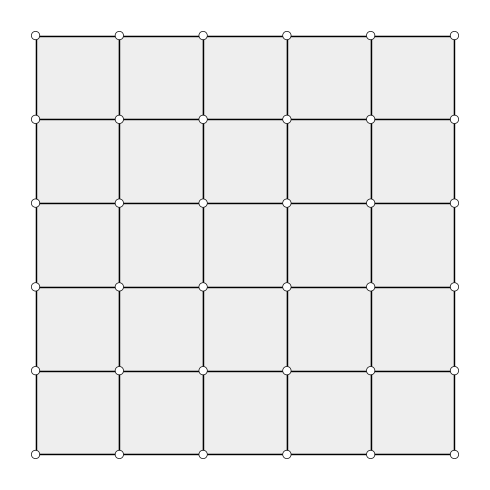

In [61]:
import os
import compas
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples/data')
FILE = os.path.join(DATA, 'faces.obj')

mesh = Mesh.from_obj(FILE)

plotter = MeshPlotter(mesh, figsize=(8, 5))
plotter.draw_vertices()
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

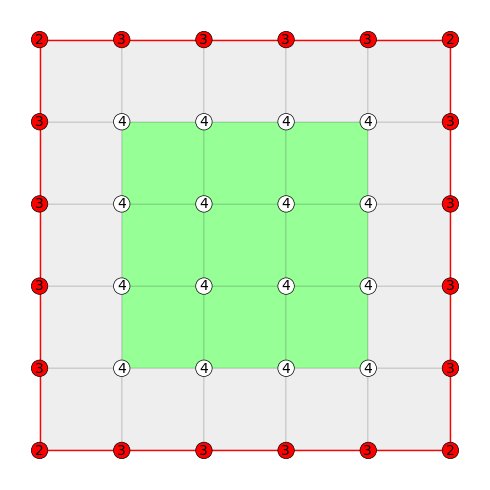

In [67]:
mesh = Mesh.from_obj(FILE)

plotter = MeshPlotter(mesh, figsize=(8, 5))

plotter.draw_vertices(
facecolor={key: (255, 0, 0) for key in mesh.vertices_on_boundary()},
text={key: str(mesh.vertex_degree(key)) for key in mesh.vertices()},
radius=0.2)

plotter.draw_edges(
keys=list(mesh.edges_on_boundary()),
color=(255, 0, 0))

plotter.draw_faces(facecolor={key: (150, 255, 150) for key in mesh.faces() if not mesh.is_face_on_boundary(key)})

plotter.show()

With artists in Rhino Python, open the example in 02_datastructures_and_geometry/examples/mesh_visualisation.py in Rhino.

With artists in Grasshopper Python, open the example in 02_datastructures_and_geometry/examples/mesh_visualisation.gh in Rhino GH.

### Accessing the data:

In [ ]:
import os
import compas
from compas.datastructures import Mesh

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples/data')
FILE = os.path.join(DATA, 'faces.obj')

mesh = Mesh.from_obj(FILE)

# print generator object
print(mesh.vertices())
print(mesh.faces())
print(mesh.edges())

# print generator object as list
print(list(mesh.vertices()))
print(list(mesh.faces()))
print(list(mesh.edges()))

# print keys
for key in mesh.vertices():
    print(key)
for key in mesh.faces():
    print(key)
for key in mesh.edges():
    print(key)

### Attributes

In [69]:
import os
import compas
from compas.datastructures import Mesh

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples/data')
FILE = os.path.join(DATA, 'faces.obj')

mesh = Mesh.from_obj(FILE)

# print the default attributes
print(mesh.default_vertex_attributes)
print(mesh.default_face_attributes)
print(mesh.default_edge_attributes)

# add default attributes to the edges
mesh.update_default_edge_attributes({'q': 1.0,'f': 0.0})
print(mesh.default_edge_attributes)

# print the default attributes of each key
for key, attr in mesh.vertices(data=True):
    print(key, attr)
for key, attr in mesh.faces(data=True):
    print(key, attr)
for u, v, attr in mesh.edges(data=True):
    print((u, v), attr)

{'x': 0.0, 'y': 0.0, 'z': 0.0}
{}
{}
{'q': 1.0, 'f': 0.0}
0 {'x': 0.0, 'y': 0.0, 'z': 0.0}
1 {'x': 2.0, 'y': 0.0, 'z': 0.0}
2 {'x': 4.0, 'y': 0.0, 'z': 0.0}
3 {'x': 6.0, 'y': 0.0, 'z': 0.0}
4 {'x': 8.0, 'y': 0.0, 'z': 0.0}
5 {'x': 10.0, 'y': 0.0, 'z': 0.0}
6 {'x': 0.0, 'y': 2.0, 'z': 0.0}
7 {'x': 2.0, 'y': 2.0, 'z': 0.0}
8 {'x': 4.0, 'y': 2.0, 'z': 0.0}
9 {'x': 6.0, 'y': 2.0, 'z': 0.0}
10 {'x': 8.0, 'y': 2.0, 'z': 0.0}
11 {'x': 10.0, 'y': 2.0, 'z': 0.0}
12 {'x': 0.0, 'y': 4.0, 'z': 0.0}
13 {'x': 2.0, 'y': 4.0, 'z': 0.0}
14 {'x': 4.0, 'y': 4.0, 'z': 0.0}
15 {'x': 6.0, 'y': 4.0, 'z': 0.0}
16 {'x': 8.0, 'y': 4.0, 'z': 0.0}
17 {'x': 10.0, 'y': 4.0, 'z': 0.0}
18 {'x': 0.0, 'y': 6.0, 'z': 0.0}
19 {'x': 2.0, 'y': 6.0, 'z': 0.0}
20 {'x': 4.0, 'y': 6.0, 'z': 0.0}
21 {'x': 6.0, 'y': 6.0, 'z': 0.0}
22 {'x': 8.0, 'y': 6.0, 'z': 0.0}
23 {'x': 10.0, 'y': 6.0, 'z': 0.0}
24 {'x': 0.0, 'y': 8.0, 'z': 0.0}
25 {'x': 2.0, 'y': 8.0, 'z': 0.0}
26 {'x': 4.0, 'y': 8.0, 'z': 0.0}
27 {'x': 6.0, 'y': 8.0, 'z': 0

In [68]:
import os
import compas
from compas.datastructures import Mesh

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples/data')
FILE = os.path.join(DATA, 'faces.obj')

mesh = Mesh.from_obj(FILE)

print(mesh.get_vertex_attribute(0, 'x')) # get the vertex attribute "x-coordinate" of the key 0
print(mesh.get_vertex_attributes(1, 'xyz')) # get the vertex attribute "xyz-coordinates" of the key 1
print(mesh.get_vertices_attribute('x')) # get all vertex attributes "x-coordinates"
print(mesh.get_vertices_attributes('xyz')) # get all vertex attributes "xyz-coordinates"

0.0
[2.0, 0.0, 0.0]
[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0]
[[0.0, 0.0, 0.0], [2.0, 0.0, 0.0], [4.0, 0.0, 0.0], [6.0, 0.0, 0.0], [8.0, 0.0, 0.0], [10.0, 0.0, 0.0], [0.0, 2.0, 0.0], [2.0, 2.0, 0.0], [4.0, 2.0, 0.0], [6.0, 2.0, 0.0], [8.0, 2.0, 0.0], [10.0, 2.0, 0.0], [0.0, 4.0, 0.0], [2.0, 4.0, 0.0], [4.0, 4.0, 0.0], [6.0, 4.0, 0.0], [8.0, 4.0, 0.0], [10.0, 4.0, 0.0], [0.0, 6.0, 0.0], [2.0, 6.0, 0.0], [4.0, 6.0, 0.0], [6.0, 6.0, 0.0], [8.0, 6.0, 0.0], [10.0, 6.0, 0.0], [0.0, 8.0, 0.0], [2.0, 8.0, 0.0], [4.0, 8.0, 0.0], [6.0, 8.0, 0.0], [8.0, 8.0, 0.0], [10.0, 8.0, 0.0], [0.0, 10.0, 0.0], [2.0, 10.0, 0.0], [4.0, 10.0, 0.0], [6.0, 10.0, 0.0], [8.0, 10.0, 0.0], [10.0, 10.0, 0.0]]


### Geometry vs Topology

The datastructure's ***topology*** refers to how the elements are connected.
The datastructure's ***geometry*** refers to where the elements are in space.

### Geometry

In [3]:
import os
import compas
from compas.datastructures import Mesh

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples/data')
FILE = os.path.join(DATA, 'faces.obj')

mesh = Mesh.from_obj(FILE)

for key in mesh.vertices():
    print(mesh.vertex_coordinates(key))
    print(mesh.vertex_normal(key))
    print(mesh.vertex_area(key))
for fkey in mesh.faces():
    print(mesh.face_coordinates(fkey))
    print(mesh.face_normal(fkey))
    print(mesh.face_area(fkey))

[0.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
1.0
[2.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[4.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[6.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[8.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[10.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
1.0
[0.0, 2.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[2.0, 2.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[4.0, 2.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[6.0, 2.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[8.0, 2.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[10.0, 2.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[0.0, 4.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[2.0, 4.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[4.0, 4.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[6.0, 4.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[8.0, 4.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[10.0, 4.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[0.0, 6.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[2.0, 6.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[4.0, 6.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[6.0, 6.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[8.0, 6.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[10.0, 6.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[0.0, 8.0, 0.0]
[0.0, 0.0, 1.0]
2.0
[2.0, 8.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[4.0, 8.0, 0.0]
[0.0, 0.0, 1.0]
4.0
[6.0, 8.0, 0.0]
[0.0, 0.

### Topology

In [4]:
mesh = Mesh.from_obj(FILE)

for key in mesh.vertices():
    print(mesh.vertex_neighbors(key))
    print(mesh.vertex_degree(key))
    print(mesh.vertex_neighborhood(key))
    print(mesh.vertex_faces(key))
for fkey in mesh.faces():
    print(mesh.face_vertices(fkey))
    print(mesh.face_neighbors(fkey))
    print(mesh.face_halfedges(fkey))
for key in mesh.face_vertices(fkey):
    print(mesh.face_vertex_ancestor(fkey, key))
    print(mesh.face_vertex_descendant(fkey, key))

[1, 6]
2
{1, 6}
[0]
[0, 7, 2]
3
{0, 2, 7}
[0, 1]
[1, 8, 3]
3
{8, 1, 3}
[1, 2]
[2, 9, 4]
3
{9, 2, 4}
[2, 3]
[3, 10, 5]
3
{10, 3, 5}
[3, 4]
[4, 11]
2
{11, 4}
[4]
[7, 0, 12]
3
{0, 12, 7}
[5, 0]
[1, 6, 8, 13]
4
{8, 1, 13, 6}
[1, 0, 6, 5]
[2, 7, 9, 14]
4
{9, 2, 14, 7}
[2, 1, 7, 6]
[3, 8, 10, 15]
4
{8, 10, 3, 15}
[3, 2, 8, 7]
[4, 9, 11, 16]
4
{16, 9, 11, 4}
[4, 3, 9, 8]
[5, 10, 17]
3
{17, 10, 5}
[4, 9]
[13, 6, 18]
3
{18, 13, 6}
[10, 5]
[7, 12, 14, 19]
4
{19, 12, 14, 7}
[6, 5, 11, 10]
[8, 13, 15, 20]
4
{8, 20, 13, 15}
[7, 6, 12, 11]
[9, 14, 16, 21]
4
{16, 9, 21, 14}
[8, 7, 13, 12]
[10, 15, 17, 22]
4
{17, 10, 22, 15}
[9, 8, 14, 13]
[11, 16, 23]
3
{16, 11, 23}
[9, 14]
[19, 12, 24]
3
{24, 19, 12}
[15, 10]
[13, 18, 20, 25]
4
{25, 18, 20, 13}
[11, 10, 16, 15]
[14, 19, 21, 26]
4
{26, 19, 21, 14}
[12, 11, 17, 16]
[15, 20, 22, 27]
4
{27, 20, 22, 15}
[13, 12, 18, 17]
[16, 21, 23, 28]
4
{16, 28, 21, 23}
[14, 13, 19, 18]
[17, 22, 29]
3
{17, 29, 22}
[14, 19]
[25, 18, 30]
3
{25, 18, 30}
[20, 15]
[19, 24, 

[0, 1, 6, 7, 2, 12, 8, 13, 3, 18, 9, 14, 19, 4, 24, 10, 15, 20, 25, 5, 30, 11, 16, 21, 26, 31, 17, 22, 27, 32, 23, 28, 33, 29, 34, 35]


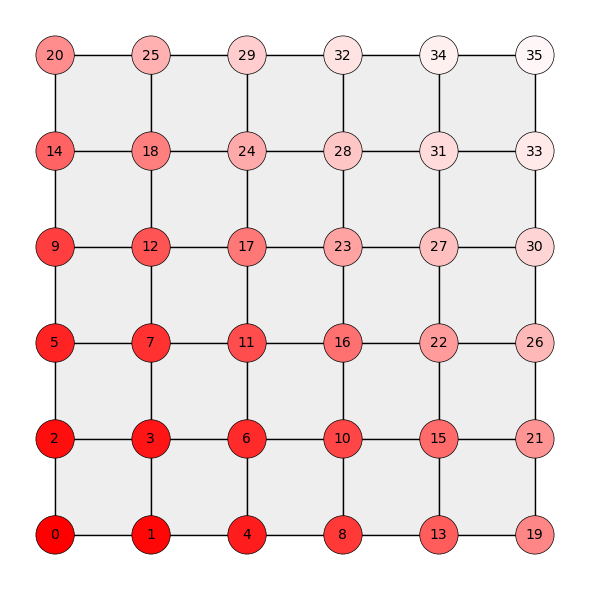

In [15]:
import os
import compas

from compas.datastructures import Mesh
from compas.topology import breadth_first_ordering
from compas.utilities import i_to_red
from compas_plotters import MeshPlotter

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples/data')
FILE = os.path.join(DATA, 'faces.obj')

mesh = Mesh.from_obj(FILE)

bfo = breadth_first_ordering(mesh.adjacency, 0)
print(bfo)

v = mesh.number_of_vertices()

plotter = MeshPlotter(mesh, figsize=(16, 6))

plotter.draw_vertices(
text={key: index for index, key in enumerate(bfo)},
radius=0.4,
facecolor={key: i_to_red(1 - index / v) for index, key in enumerate(bfo)})

plotter.draw_edges()
plotter.draw_faces()
plotter.show()